In [21]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [22]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [24]:
tesla = yf.Ticker("TSLA")

In [25]:
tesla_data = tesla.history(period="max")

In [26]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [27]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

In [28]:
soup = BeautifulSoup(html_data,"html5lib")

In [29]:
tesla_revenue= pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue=tesla_revenue.rename(columns = {'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",","").str.replace("$","")
tesla_revenue.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [30]:
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [31]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [32]:
gamestop = yf.Ticker("GME")

In [33]:
gme_data=gamestop.history(period="max")

In [34]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [35]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text

In [36]:
soup = BeautifulSoup(html_data,"html5lib")

In [37]:
gme_revenue= pd.read_html(url, match="GameStop Quarterly Revenue", flavor='bs4')[0]
gme_revenue=gme_revenue.rename(columns = {'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'}, inplace = False)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",","").str.replace("$","")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [38]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
51,2010-01-31,3524
52,2009-10-31,1835
53,2009-07-31,1739
54,2009-04-30,1981
55,2009-01-31,3492


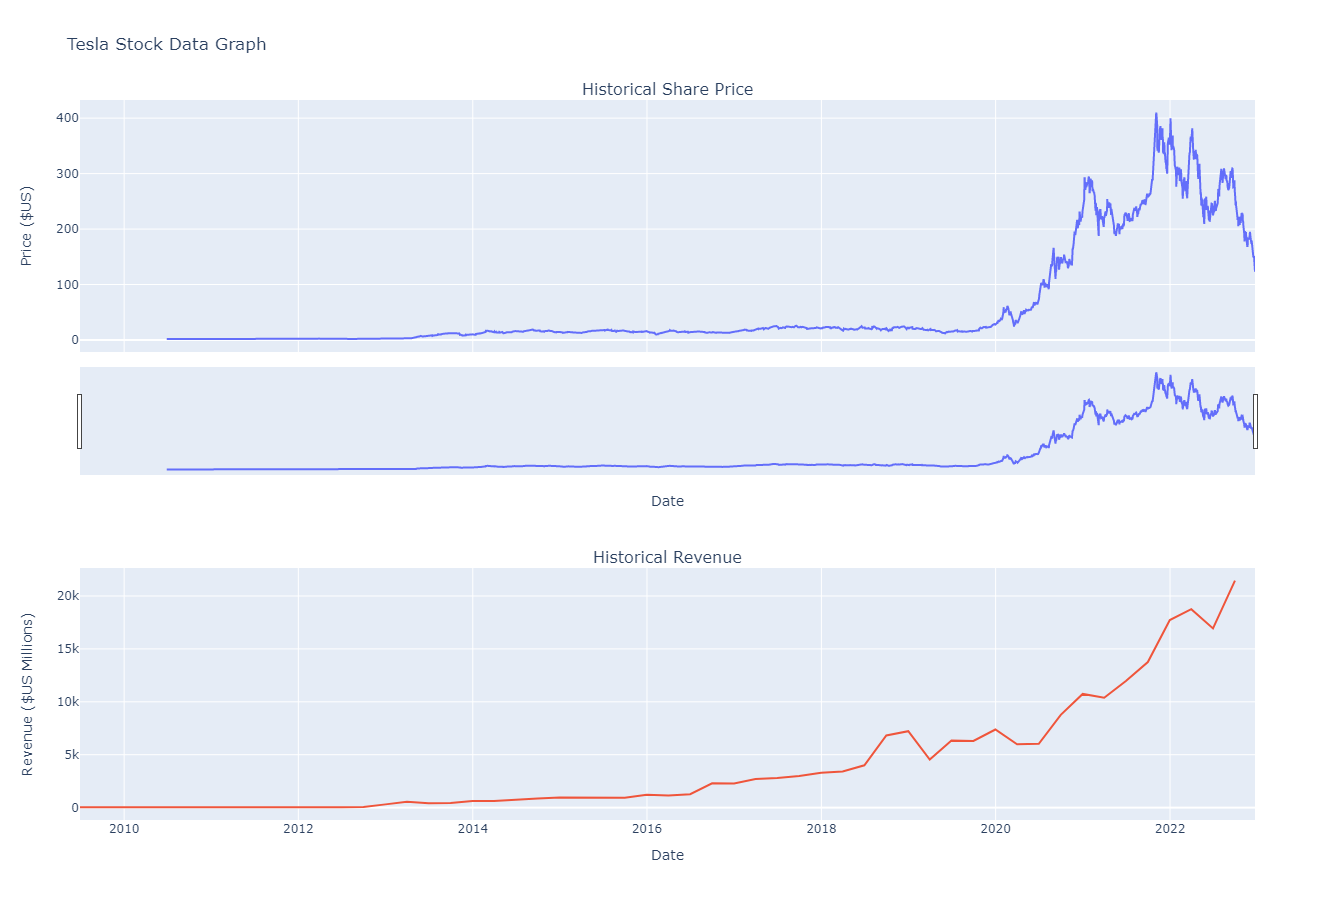

In [39]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')

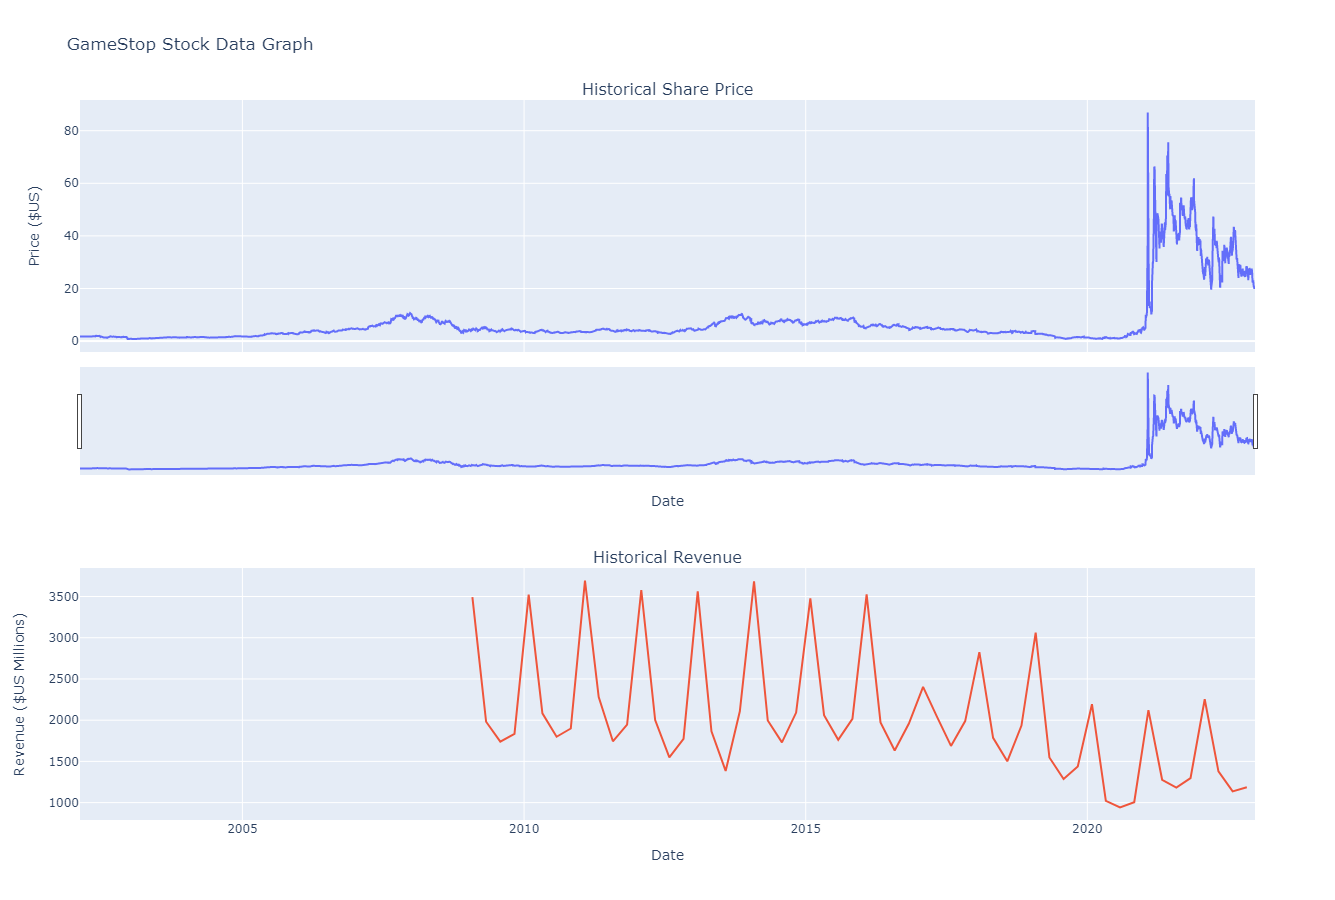

In [40]:

make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')